<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/kernel_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# Kernel Principal Component Analysis

This example shows that the comparisions between Kernel PCA and the standard PCA.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [3]:
# Generate the circles data

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

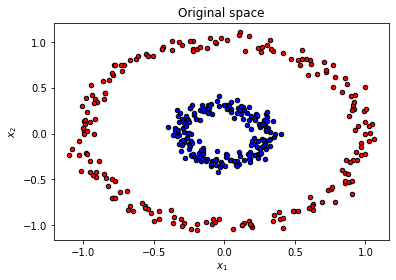

In [14]:
# Plot Oritinal Space

reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig("circles_data.png")
plt.show()

In [7]:
# PCA of the cirlces data

pca = PCA()
X_pca = pca.fit_transform(X)

print(pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


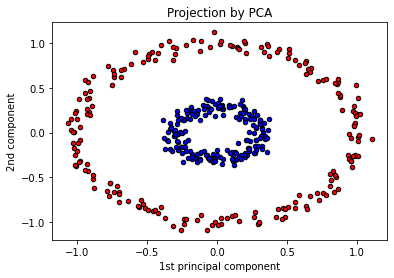

In [15]:
# Plot the results of PCA

plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")
plt.savefig("pca_circles_data.png")
plt.show()

In [10]:
# Kernel PCA of the circles data. Backprojection is also computed.

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

print(kpca)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=10, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)


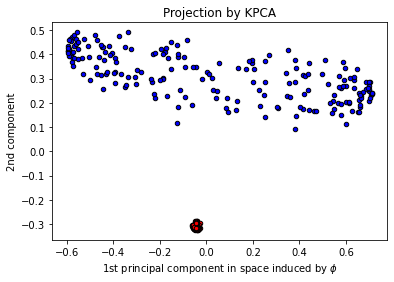

In [16]:
# Plot of the results of Kernel PCA

#plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.savefig("kpca_circles_data.png")
plt.show()

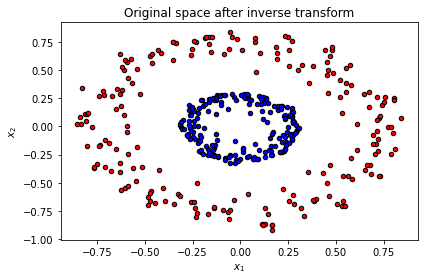

In [17]:
# Plot of the back projection from the 2D space of Kernel PCA

#plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig("kpca_back_circles_data.png")
plt.tight_layout()
plt.show()